Using this notebook to post the results of the model

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df = pd.read_csv("../checkpoints/checkpoints/metrics.csv")

In [4]:
sns.set_theme(style="whitegrid", context="talk", font_scale=1.2)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.family"] = "serif"

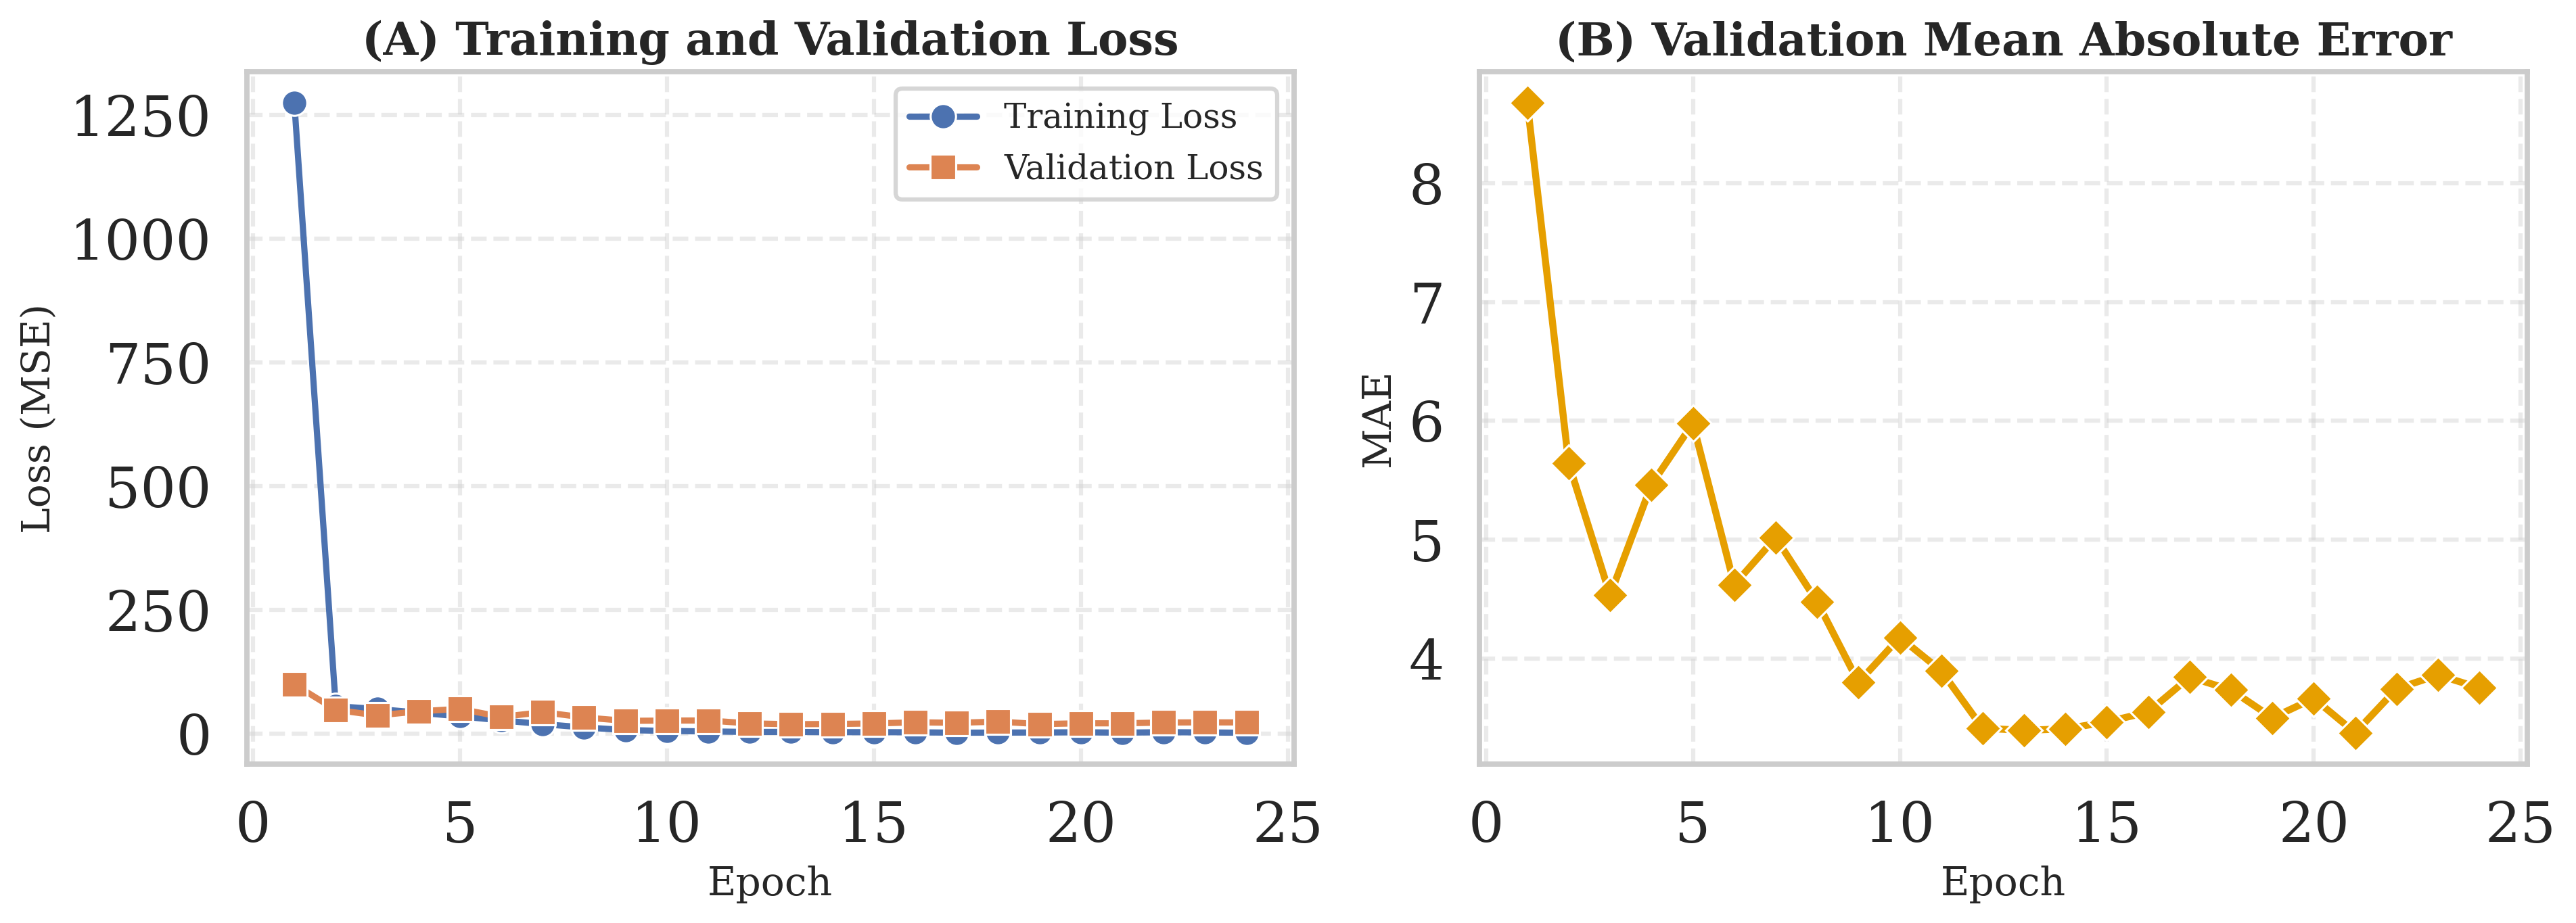

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

sns.lineplot(
    x="Epoch", y="Train Loss", data=df, label="Training Loss",
    linewidth=2.2, marker="o", ax=axes[0]
)
sns.lineplot(
    x="Epoch", y="Val Loss", data=df, label="Validation Loss",
    linewidth=2.2, marker="s", ax=axes[0]
)
axes[0].set_title("(A) Training and Validation Loss", fontsize=16, fontweight="bold")
axes[0].set_xlabel("Epoch", fontsize=14)
axes[0].set_ylabel("Loss (MSE)", fontsize=14)
axes[0].legend(frameon=True, fontsize=12)
axes[0].grid(True, linestyle="--", alpha=0.4)

sns.lineplot(
    x="Epoch", y="Val MAE", data=df, color="#E69F00",
    linewidth=2.5, marker="D", ax=axes[1]
)
axes[1].set_title("(B) Validation Mean Absolute Error", fontsize=16, fontweight="bold")
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].set_ylabel("MAE", fontsize=14)
axes[1].grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.savefig("training_performance_composite.png", dpi=300, bbox_inches="tight")
plt.savefig("training_performance_composite.pdf", bbox_inches="tight")
plt.show()

# Brain Age Gap Metrics

In [ ]:
# Get inference results data
df_inference = pd.read_csv("../data/inference_results_2.csv")


In [3]:
# Create BAG values
true_ages = df_inference['age'].values
predicted_ages = df_inference['predicted_age'].values

bag = predicted_ages - true_ages

In [5]:
# Metrics from sklearn and numoy
mae = mean_absolute_error(true_ages, predicted_ages)
rmse = np.sqrt(mean_squared_error(true_ages, predicted_ages))
corr = np.corrcoef(true_ages, predicted_ages)[0,1]

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"Correlation: {corr:.3f}")

MAE: 4.851
RMSE: 5.900
Correlation: 0.743


A larger BAG is linked to higher risks of cognitive decline, dementia

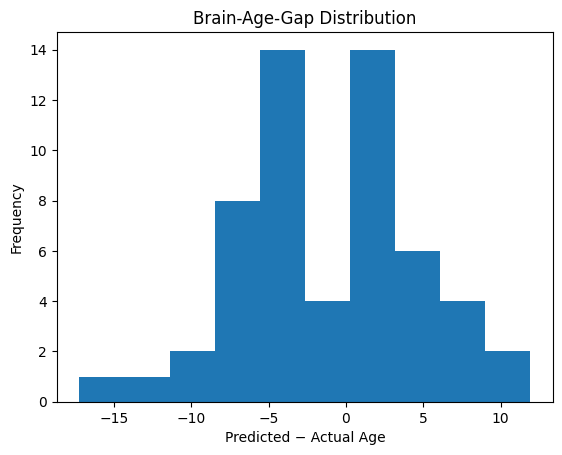

In [ ]:
# Plot: BAG Histogram
plt.figure()
plt.hist(bag, bins=10)
plt.title("Brain-Age-Gap Distribution")
plt.xlabel("Predicted − Actual Age")
plt.ylabel("Frequency")
plt.show()

## A few samples likely have errors in the 8–12 year range.

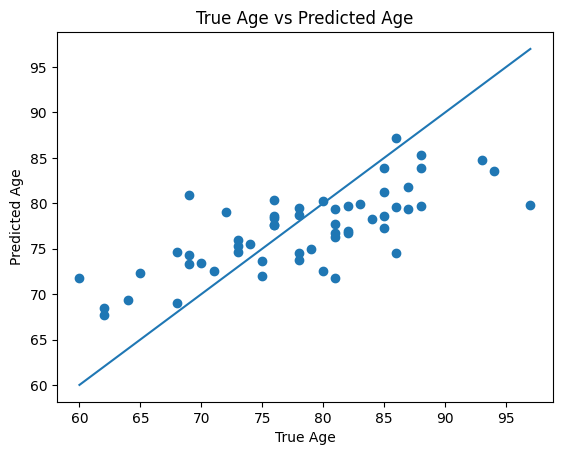

In [7]:
# Plot: True vs Predicted Scatter
plt.figure()
plt.scatter(true_ages, predicted_ages)
plt.title("True Age vs Predicted Age")
plt.xlabel("True Age")
plt.ylabel("Predicted Age")
plt.plot([true_ages.min(), true_ages.max()],
         [true_ages.min(), true_ages.max()])
plt.show()

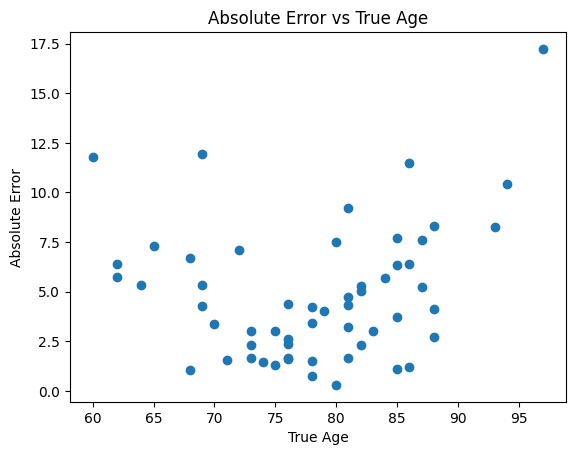

In [8]:
# Plot: MAE / RMSE vs True Age
# per-sample errors
abs_errors = np.abs(predicted_ages - true_ages)

plt.figure()
plt.scatter(true_ages, abs_errors)
plt.title("Absolute Error vs True Age")
plt.xlabel("True Age")
plt.ylabel("Absolute Error")
plt.show()


The Absolute Error vs True Age plot shows that the model performs well across the mid-age range (approximately 72–85 years), where most predictions fall within 1–5 years of the true age.  
However, the model exhibits increased error at the age extremes, with younger participants (60–65 years) and older participants (above 90 years) showing noticeably larger deviations, including one outlier with an error exceeding 17 years.